In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from itertools import product
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
 final_hist = pd.read_csv('ML DIVIDED QUESTIONS/HALeWHOregionLifeExpectancyAtBirth.csv')

In [3]:
# Check column names
print("\nColumns in final_hist:")
print(final_hist.columns)


Columns in final_hist:
Index(['Location', 'Period', 'Indicator', 'Dim1', 'Hale Expectency',
       'Life expectany', 'Unnamed: 6', '% OF HALE in life expectancy'],
      dtype='object')


In [4]:
# Display basic information about the dataset
print(final_hist.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location                      72 non-null     object 
 1   Period                        72 non-null     int64  
 2   Indicator                     72 non-null     object 
 3   Dim1                          72 non-null     object 
 4   Hale Expectency               72 non-null     float64
 5   Life expectany                72 non-null     float64
 6   Unnamed: 6                    72 non-null     float64
 7   % OF HALE in life expectancy  72 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.6+ KB
None


In [5]:
final_hist.head()

,Location,Period,Indicator,Dim1,Hale Expectency,Life expectany,Unnamed: 6,% OF HALE in life expectancy
0,Africa,2019,Healthy life expectancy (HALE) at birth (years),Both sexes,56.04,64.49,86.897193,87
1,Africa,2019,Healthy life expectancy (HALE) at birth (years),Male,55.00,62.37,88.183422,88
2,Africa,2019,Healthy life expectancy (HALE) at birth (years),Female,57.09,66.65,85.656414,86
3,Africa,2015,Healthy life expectancy (HALE) at birth (years),Both sexes,54.42,62.56,86.988491,87
4,Africa,2015,Healthy life expectancy (HALE) at birth (years),Male,53.38,60.47,88.275178,88


In [6]:
# Check for missing values
print(final_hist.isnull().sum())

Location                        0
Period                          0
Indicator                       0
Dim1                            0
Hale Expectency                 0
Life expectany                  0
Unnamed: 6                      0
% OF HALE in life expectancy    0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = final_hist[final_hist.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [8]:
#No missing values
# Check data types of each column
print(final_hist.dtypes)

Location                         object
Period                            int64
Indicator                        object
Dim1                             object
Hale Expectency                 float64
Life expectany                  float64
Unnamed: 6                      float64
% OF HALE in life expectancy      int64
dtype: object


In [9]:
# Count unique values in each column
unique_counts = final_hist.nunique()
print(unique_counts)

Location                         6
Period                           4
Indicator                        1
Dim1                             3
Hale Expectency                 71
Life expectany                  72
Unnamed: 6                      72
% OF HALE in life expectancy     6
dtype: int64


In [10]:
# type= object
# List of columns to inspect
columns_to_inspect = ['Location', 'Indicator', 'Dim1']

# Iterate through columns and print unique values
for col in columns_to_inspect:
    unique_values = final_hist[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

Unique values in column 'Location':
['Africa' 'Americas' 'South-East Asia' 'Europe' 'Eastern Mediterranean'
 'Western Pacific']


Unique values in column 'Indicator':
['Healthy life expectancy (HALE) at birth (years)']


Unique values in column 'Dim1':
['Both sexes' 'Male' 'Female']




In [11]:
# Iterate through columns and print value counts
for col in columns_to_inspect:
    value_counts = final_hist[col].value_counts()
    print(f"Value counts for column '{col}':")
    print(value_counts)
    print("\n")

Value counts for column 'Location':
Location
Africa                   12
Americas                 12
South-East Asia          12
Europe                   12
Eastern Mediterranean    12
Western Pacific          12
Name: count, dtype: int64


Value counts for column 'Indicator':
Indicator
Healthy life expectancy (HALE) at birth (years)    72
Name: count, dtype: int64


Value counts for column 'Dim1':
Dim1
Both sexes    24
Male          24
Female        24
Name: count, dtype: int64




In [12]:
#  Identify outliers using summary statistics (for numerical columns)
final_hist.describe()

,Period,Hale Expectency,Life expectany,Unnamed: 6,% OF HALE in life expectancy
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2011.000000,61.403333,70.556806,87.038804,87.013889
std,7.156205,5.982161,6.880156,1.417579,1.409156
min,2000.000000,45.030000,51.060000,84.556613,85.000000
25%,2007.500000,57.870000,66.585000,86.022416,86.000000
50%,2012.500000,61.665000,71.375000,87.040977,87.000000
75%,2016.000000,66.360000,75.525000,88.185157,88.000000
max,2019.000000,70.240000,81.290000,90.128940,90.000000


C:\Users\Merve Balbay\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merve Balbay\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merve Balbay\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Merve Balbay\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

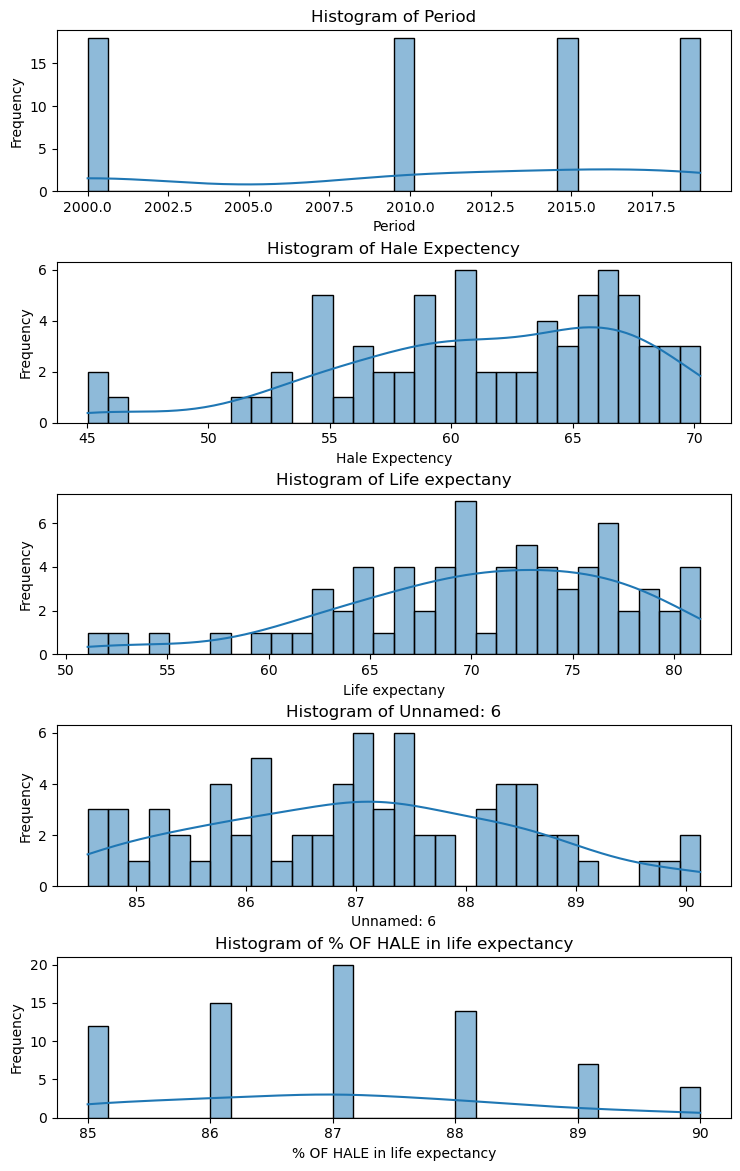

In [14]:
# Select numerical columns for histogram plotting
numerical_columns = ['Period', 'Hale Expectency', 'Life expectany', 'Unnamed: 6', '% OF HALE in life expectancy']

# Set up subplots for histograms
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 12))
fig.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(final_hist[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()

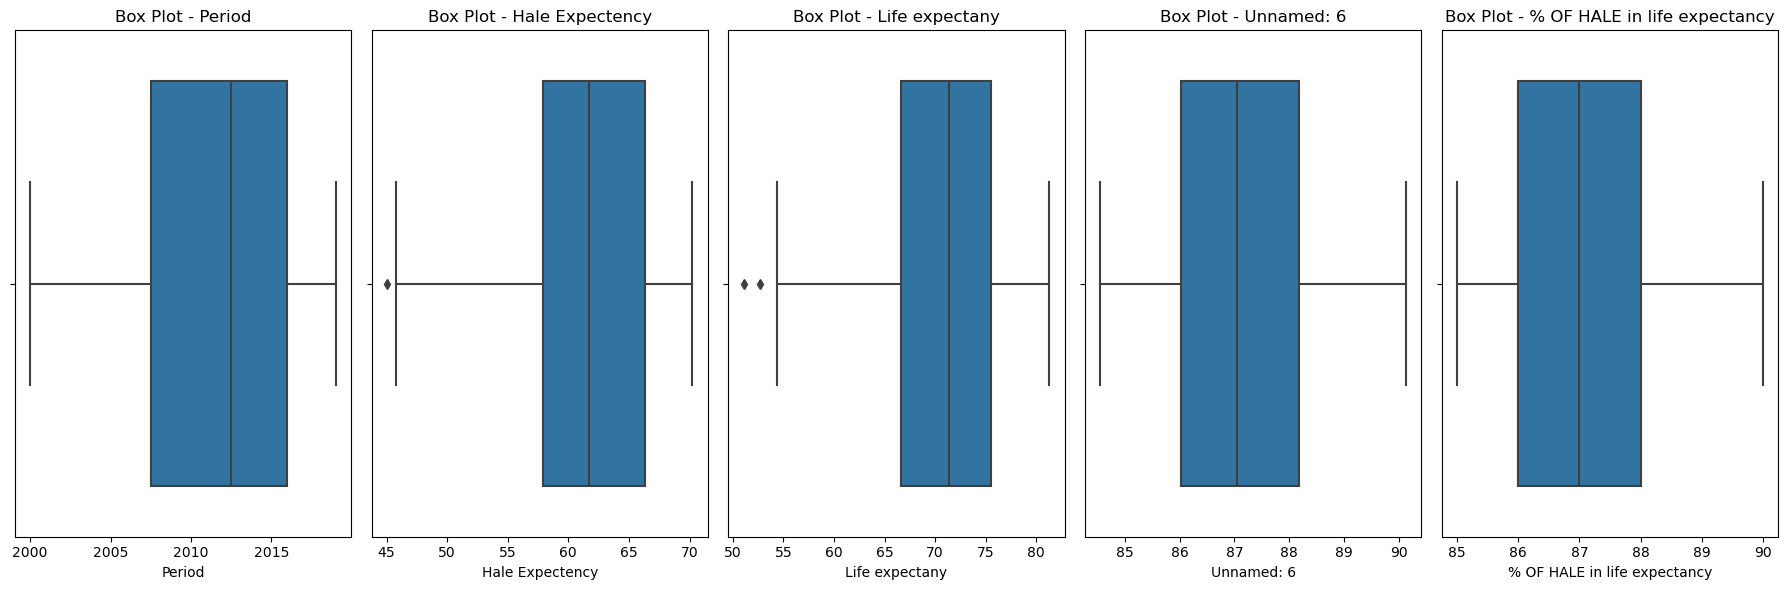

In [17]:
# Box plots 
fig, axs = plt.subplots(1, 5, figsize=(18, 6))  # Changed from 1, 2 to 1, 3 for three plots

# Box plot
sns.boxplot(x=final_hist['Period'], ax=axs[0])
axs[0].set_title('Box Plot - Period')

#
sns.boxplot(x=final_hist['Hale Expectency'], ax=axs[1])
axs[1].set_title('Box Plot - Hale Expectency')

# 
sns.boxplot(x=final_hist['Life expectany'], ax=axs[2])
axs[2].set_title('Box Plot - Life expectany')

# 
sns.boxplot(x=final_hist['Unnamed: 6'], ax=axs[3])
axs[3].set_title('Box Plot - Unnamed: 6')

# 
sns.boxplot(x=final_hist['% OF HALE in life expectancy'], ax=axs[4])
axs[4].set_title('Box Plot - % OF HALE in life expectancy')


# Adjust layout
plt.tight_layout()
plt.show()